<h1 style="text-align:center; font-size:35px; color:black;">Web Traffic Analysis: Understanding User Interaction </h1>


# 🔬 Project Summary

This project analyzes website traffic data to better understand user interactions with different pages over a 7-day period. The dataset includes events like pageviews, previews, and clicks, along with information about where the traffic comes from and page content identifiers (isrc).

### This notebook is for analyzing and visualizing the data. It: 

* Explores overall traffic patterns and daily distributions.
* Looks at where pageviews come from.
* Calculates overall and per-link click rates.
* Studies the relationship between previews and clicks.
* Creates charts and visualizations to show key insights.

The goal is to understand user interactions and find patterns that can help improve engagement. 

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
traffic_cleaned = pd.read_csv("website_traffic_cleaned.csv")

# Data Analysis

* ## Total pageviews and daily distribution

**Question:** Total number of pageviews and how they are distributed per day.

In [3]:
# Total pageviews
total_pageviews = (traffic_cleaned['event'] == 'pageview').sum()
print("Total pageviews:", total_pageviews)

# Pageviews per day
pageviews_per_day = traffic_cleaned[traffic_cleaned['event'] == 'pageview'].groupby('date').size()
print("\nPageviews per day:")
print(pageviews_per_day.head())

Total pageviews: 142015

Pageviews per day:
date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
dtype: int64


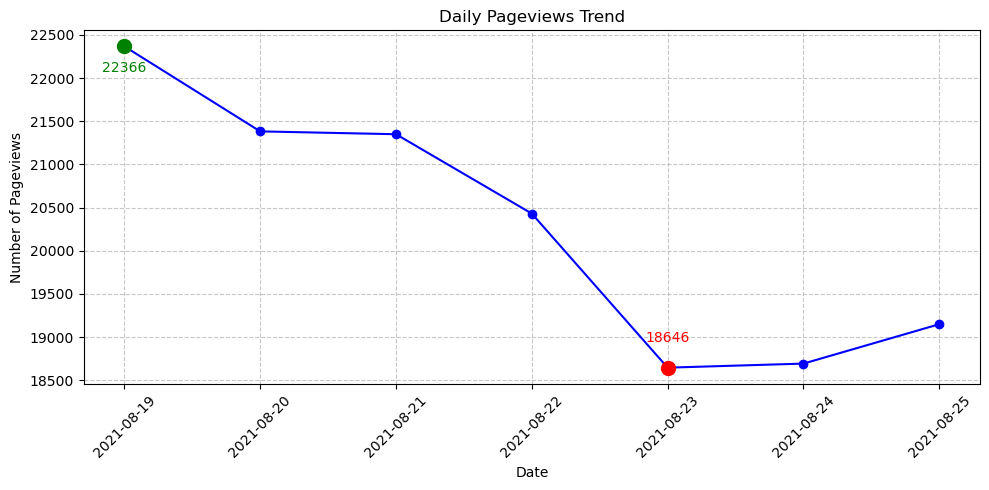

In [4]:
# Identify highest and lowest pageviews
max_day = pageviews_per_day.idxmax()
min_day = pageviews_per_day.idxmin()
max_value = pageviews_per_day[max_day]
min_value = pageviews_per_day[min_day]

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(pageviews_per_day.index, pageviews_per_day.values, marker='o', color='blue', label='Pageviews')

# Highlight max and min points
plt.scatter(max_day, max_value, color='green', s=100, zorder=5, label='Max')
plt.scatter(min_day, min_value, color='red', s=100, zorder=5, label='Min')

# Annotate points
plt.text(max_day, max_value-300, f"{max_value}", ha='center', color='green')
plt.text(min_day, min_value+300, f"{min_value}", ha='center', color='red')

plt.title("Daily Pageviews Trend")
plt.xlabel("Date")
plt.ylabel("Number of Pageviews")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%; text-align: center;">

The links received a total of **142,015 pageviews** over the period. Daily traffic was **highest on 8/19** with 22,366 views and **gradually decreased** to 18,646 views by 8/23, showing a slight downward trend in pageviews over time.

* ## Other recorded events

**Question:** Counts of other event types and how they change over time.

event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64


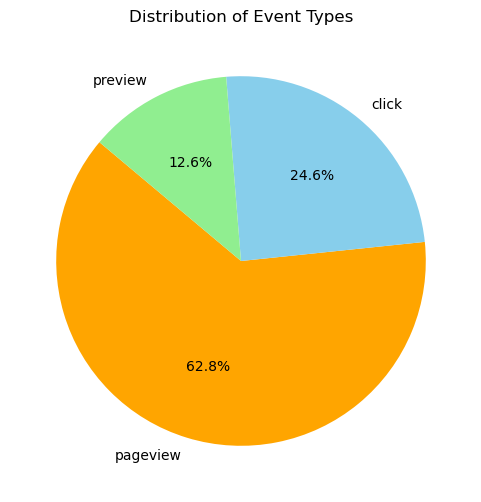

In [5]:
# Count of each event type
event_counts = traffic_cleaned['event'].value_counts()

print(event_counts)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'skyblue', 'lightgreen'])
plt.title("Distribution of Event Types")
plt.show()

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%; text-align: center;">

* Total events recorded are 142,015 pageviews, 55,732 clicks, and 28,531 previews.

* **Pageviews** dominate the activity, while clicks and previews show a smaller level of user engagement.

Events per day:
event       click  pageview  preview
date                                
2021-08-19   9207     22366     3788
2021-08-20   8508     21382     4222
2021-08-21   8071     21349     4663
2021-08-22   7854     20430     4349
2021-08-23   7315     18646     3847


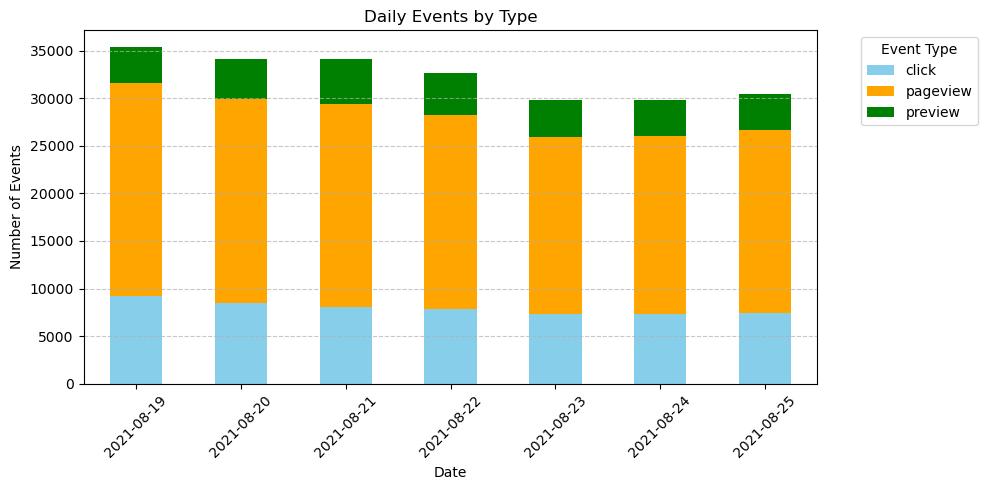

In [6]:
# Events per day
events_per_day = traffic_cleaned.groupby(['date', 'event']).size().unstack(fill_value=0)
print("Events per day:")
print(events_per_day.head())


# Stacked bar chart of daily events
events_per_day.plot(kind='bar', stacked=True, figsize=(10,5), color=['skyblue', 'orange', 'green'])
plt.title("Daily Events by Type")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title="Event Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%; text-align: center;">


* **Pageviews** consistently dominate daily events, ranging from 22,366 on 8/19 to 18,646 on 8/23, showing a **slight downward** trend.

* **Clicks and previews** are smaller in number, with clicks decreasing from 9,207 to 7,315 and previews fluctuating around 3,788 – 4,663, indicating that a portion of users engage with links after viewing.

* ## Pageviews by country

**Question:** From which countries do pageviews originate.

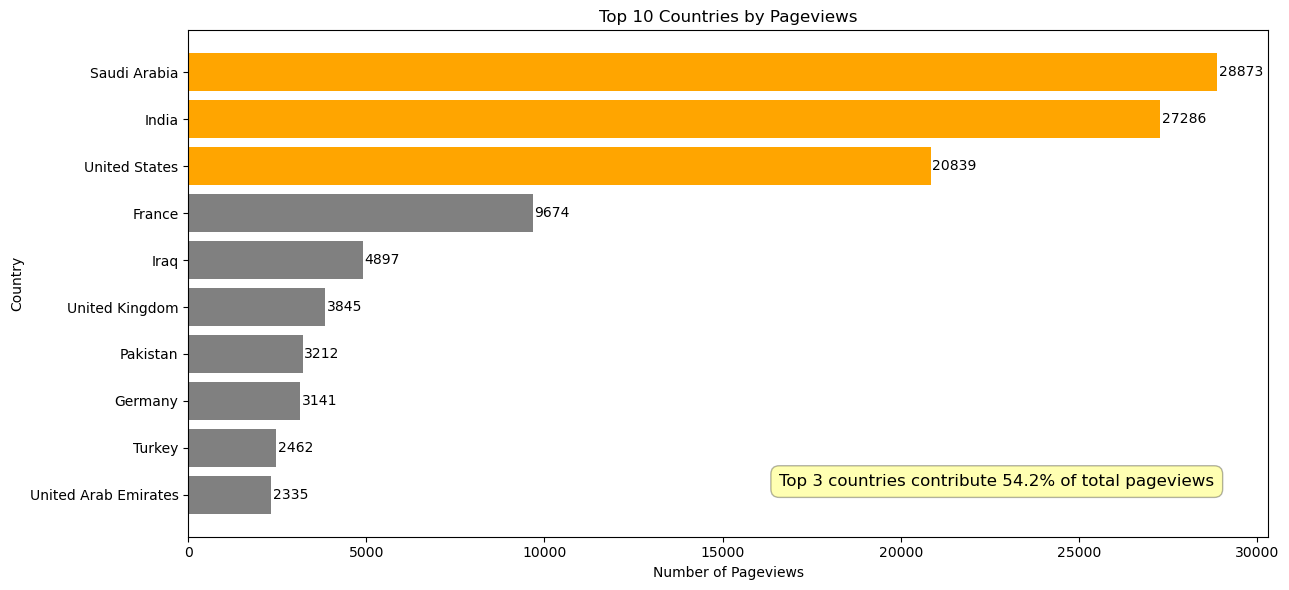

In [7]:
countries_pageviews = (traffic_cleaned[traffic_cleaned['event'] == 'pageview']
                       .groupby('country')
                       .size()
                       .sort_values(ascending=False))

# Top 10 
top_countries = countries_pageviews.head(10)

# Calculate the top 3 
top3_sum = top_countries.values[:3].sum()
total_sum = countries_pageviews.sum()
top3_percent = top3_sum / total_sum * 100


colors = ['orange' if i < 3 else 'grey' for i in range(len(top_countries))]

plt.figure(figsize=(13,6))
bars = plt.barh(top_countries.index, top_countries.values, color=colors)
plt.xlabel("Number of Pageviews")
plt.ylabel("Country")
plt.title("Top 10 Countries by Pageviews")

# Add counts on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, str(width), va='center')

# Add a note box
plt.text(
    0.95, 0.1, 
    f"Top 3 countries contribute {top3_percent:.1f}% of total pageviews", 
    transform=plt.gca().transAxes,
    fontsize=12, 
    color='black',
    bbox=dict(facecolor='yellow', alpha=0.3, boxstyle='round,pad=0.5'),
    horizontalalignment='right'
)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%; text-align: center;">

* The top 10 countries by pageviews show that most traffic comes from **Saudi Arabia, India, and the United States**. Together, these 3 countries make up 54.2% of all pageviews.
  
* Other countries, like France, Iraq, and the United Kingdom, have moderate traffic, while Turkey and the UAE have fewer pageviews.

This means the links are most popular in the top 3 countries, and **targeting content to these regions could increase engagement**. There is also potential to grow traffic in countries with lower pageviews.

* ## Overall clickrate

**Question:** Overall proportion of pageviews that result in clicks.

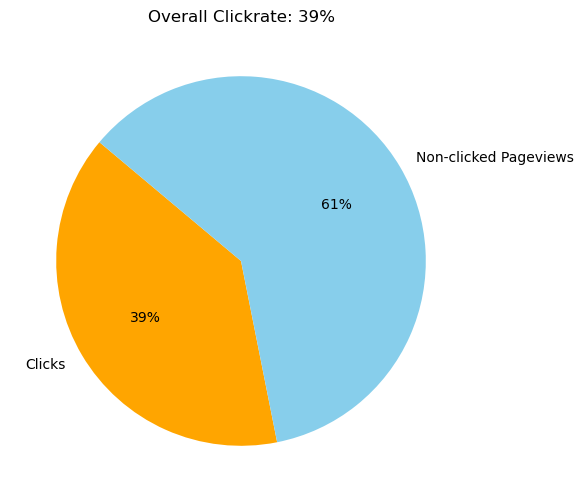

In [8]:
# Counts
total_pageviews = traffic_cleaned['event'].value_counts()['pageview']
total_clicks = traffic_cleaned['event'].value_counts()['click']

# Overall clickrate in %
clickrate_percent = total_clicks / total_pageviews * 100

# Pie chart: clicks vs remaining pageviews
plt.figure(figsize=(6,6))
plt.pie(
    [total_clicks, total_pageviews - total_clicks],
    labels=['Clicks', 'Non-clicked Pageviews'],
    autopct='%1.0f%%',
    colors=['orange', 'skyblue'],
    startangle=140
)
plt.title(f"Overall Clickrate: {clickrate_percent:.0f}%")
plt.show()

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

Out of all pageviews in the dataset, 39% resulted in clicks. The remaining **61% of pageviews did not** lead to a click, suggesting there is **potential to increase engagement** by improving link appeal or targeting content more effectively.

* ### Clickrate per link

**Question:** How clickrate varies across individual links.

In [9]:
link_stats = traffic_cleaned.pivot_table(
    index='linkid',
    columns='event',
    aggfunc='size',
    fill_value=0
)

# Calculate clickrate per link
link_stats['clickrate'] = link_stats['click'] / link_stats['pageview'].replace(0, pd.NA)

# Summary statistics
print("Clickrate summary across links:")
print(link_stats['clickrate'].describe())

Clickrate summary across links:
count     3837.0
unique     338.0
top          0.0
freq      1584.0
Name: clickrate, dtype: float64


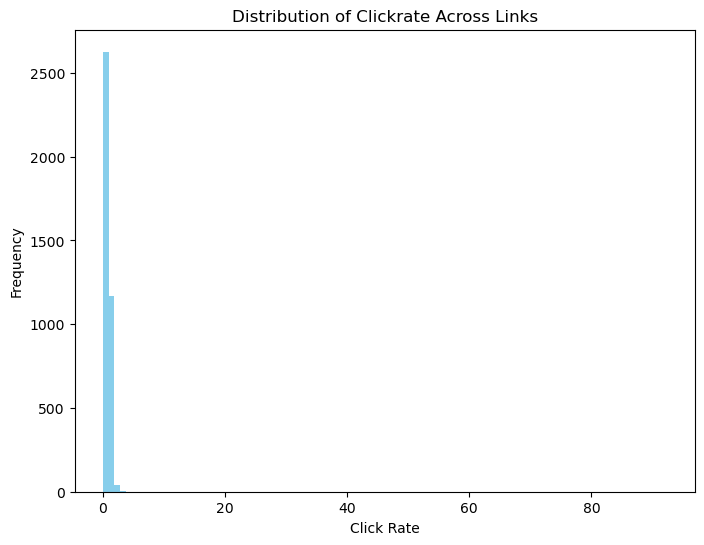

In [10]:
# Histogram of clickrate
link_stats['clickrate'] = pd.to_numeric(link_stats['clickrate'], errors='coerce')

# Drop NaN values
clickrate_clean = link_stats['clickrate'].dropna()

# Histogram
plt.figure(figsize=(8,6))
clickrate_clean.plot(kind='hist', bins=100, color='skyblue')
plt.xlabel('Click Rate')
plt.title('Distribution of Clickrate Across Links')
plt.show()


* Many links have **low clickrates**, and a few links may have very high clickrates.
* Data is usually **right-skewed** (most values near 0 or 1, few outliers).

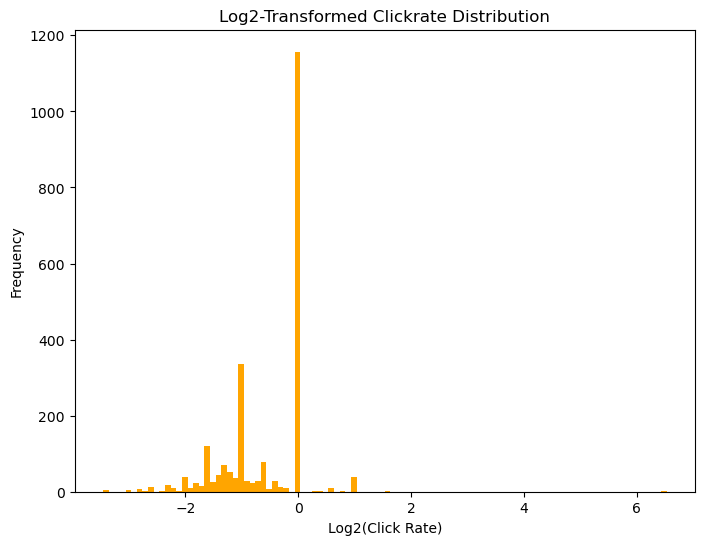

In [11]:
# Logarithmic transformation (to handle skew)
clickrate_clean_nonzero = clickrate_clean[clickrate_clean > 0]

# Log2 transformation
clickrate_log2 = np.log2(clickrate_clean_nonzero)

# Histogram
plt.figure(figsize=(8,6))
clickrate_log2.plot(kind='hist', bins=100, color='orange')
plt.xlabel('Log2(Click Rate)')
plt.title('Log2-Transformed Clickrate Distribution')
plt.show()

* A spike at 0 (log2(1)) shows many links with **clickrate = 1**.
* Negative values correspond to **clickrate < 1 (more pageviews than clicks)**.
* Log transformation makes it easier to see **variation among low-clickrate links**.

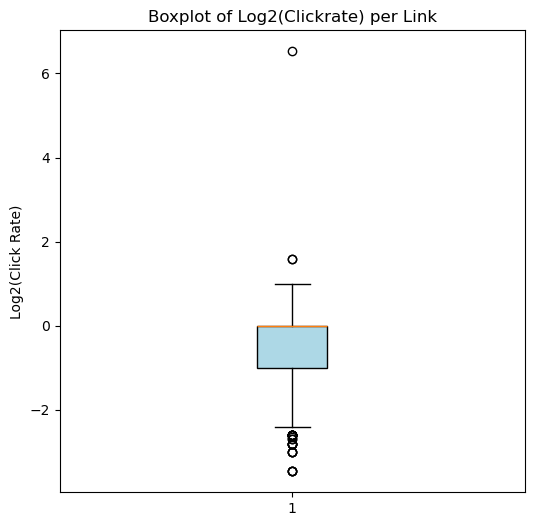

In [12]:
# Boxplot of log2(clickrate)
plt.figure(figsize=(6,6))
plt.boxplot(clickrate_log2, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel('Log2(Click Rate)')
plt.title('Boxplot of Log2(Clickrate) per Link')
plt.show()

* The boxplot shows **many links with low clickrate**, a median around 0, and 2 high outliers.
* Outliers could be links that are **clicked many times relative to pageviews**, or unusual logging events.

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

* Most links have **low to moderate clickrates**, with many links having a clickrate near 1. 
* A few links are **outliers** with unusually high clickrates, suggesting some links were clicked multiple times relative to their pageviews.

Focusing on improving low-performing links and learning from high-performing ones could increase overall clicks.

* ## Correlation between clicks and previews

**Question:** Are clicks and previews related, and is it significant?

I will test two things:

* **Linear correlation** - whether the number of previews increases with clicks.
* **Categorical relationship** - if other link attributes (like artist or album) influence this relationship.

### Prepare data per link

Each link’s total number of clicks and previews is calculated.


In [13]:
# Group by linkid and count clicks and previews
link_stats = traffic_cleaned.pivot_table(
    index='linkid',
    columns='event',
    aggfunc='size',
    fill_value=0
).reset_index()

# Make sure columns exist
if 'click' not in link_stats.columns:
    link_stats['click'] = 0
if 'preview' not in link_stats.columns:
    link_stats['preview'] = 0

# Display a few rows
print(link_stats.head())

event                                linkid  click  pageview  preview
0      00073307-ae96-5089-a117-4783afb42f8e      0         2        0
1      00126b32-0c35-507b-981c-02c80d2aa8e7      2         2        0
2      0018cfff-50a1-5984-9715-01ef2d11a49a      0         1        0
3      0033934b-5d16-5a06-af58-d087bcdd3680      0         1        0
4      0034d6cf-3bd8-5ffe-aafc-b3959fc48608      0         1        0


---
Each row represents one link (`linkid`).
The columns show how many clicks and previews each link received, making comparison straightforward.

### Measure linear correlation

A Pearson correlation test measures the strength and direction of the linear relationship between the two variables. 

In [14]:
# Pearson correlation
r, p = stats.pearsonr(link_stats['click'], link_stats['preview'])
print(f"Pearson correlation: r = {r:.3f}, p = {p:.3e}")

Pearson correlation: r = 0.989, p = 0.000e+00


---
* **r (correlation coefficient):** ranges from -1 to 1. Values near 1 indicate a strong positive relationship.
* **p (p-value):** values below 0.05 indicate a statistically significant correlation.

The correlation between clicks and previews is **very strong (r = 0.989) and statistically significant (p < 0.001)**. This means that links with more previews usually get more clicks.

### Compare links with and without previews

A t-test is used to check whether links that have at least one preview tend to receive more clicks than links with no previews.

In [15]:
# Create binary indicator for having previews
link_stats['has_preview'] = (link_stats['preview'] > 0).astype(int)

# Separate the two groups
clicks_with_preview = link_stats.loc[link_stats['has_preview'] == 1, 'click']
clicks_without_preview = link_stats.loc[link_stats['has_preview'] == 0, 'click']

# Independent t-test
t_stat, p_val = stats.ttest_ind(clicks_with_preview, clicks_without_preview, equal_var=False)
print(f"T-test clicks with vs without preview: t = {t_stat:.3f}, p = {p_val:.3f}")


T-test clicks with vs without preview: t = 4.656, p = 0.000


---
The t-test result shows **t = 4.656 and p < 0.001**, meaning the difference is statistically significant.

Links that have previews receive **more clicks on average** than links without any previews.

### Visualize the relationship

A scatter plot helps display the pattern between previews and clicks.

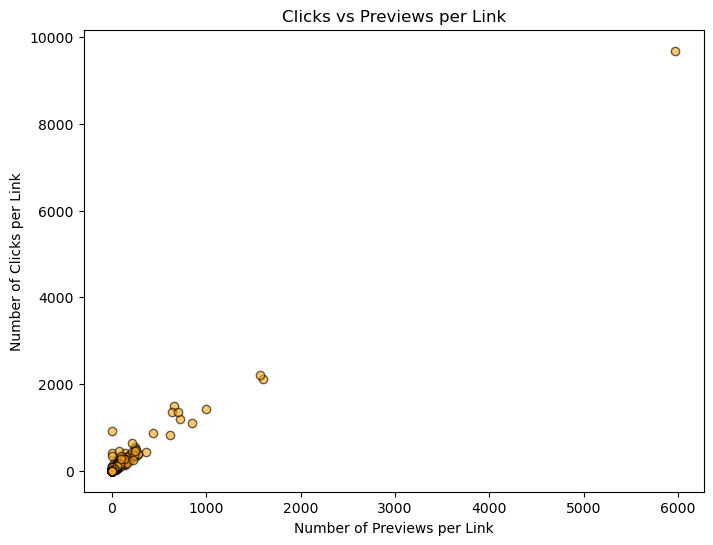

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(link_stats['preview'], link_stats['click'], alpha=0.6, color='orange', edgecolor='k')
plt.xlabel('Number of Previews per Link')
plt.ylabel('Number of Clicks per Link')
plt.title('Clicks vs Previews per Link')

plt.show()

---
A visible **upward trend** in the points indicates that **more previews are generally associated with more clicks**.

<div style="border-radius: 10px; border: purple solid; padding: 10px; background-color: #; font-size: 100%;">

### Findings

* The Pearson correlation (r ~ 0.98) indicates an **almost perfect linear** relationship between previews and clicks.

* The **p-value is extremely small**, confirming that the relationship is statistically significant.

* Links with previews receive **significantly more clicks** than those without any previews.

* The scatter plot shows a clear **upward pattern**, meaning links with more previews tend to have more clicks.